In [1]:
# pip install gensim
# pip install scikit-learn
# pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/torch_stable.html

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec


device = torch.device("cuda:0")

""" #CUDA
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for computation.")
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print("Number of available GPUs:", num_gpus)
else:
    device = torch.device("cpu")
    print("Using CPU.") 
"""

' #CUDA\nif torch.cuda.is_available():\n    device = torch.device("cuda")\n    print("Using GPU for computation.")\n    # Get the number of available GPUs\n    num_gpus = torch.cuda.device_count()\n    print("Number of available GPUs:", num_gpus)\nelse:\n    device = torch.device("cpu")\n    print("Using CPU.") \n'

In [3]:
# Load preprocessed datasate into pandas Dataframe
df = pd.read_csv("data/t2p2-bool-numerical.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_HOT_Internet,sales_channel_HOT_Mobile,trip_type_HOT_CircleTrip,trip_type_HOT_OneWay,trip_type_HOT_RoundTrip,route_part1,route_part2,booking_complete
0,2,262,19,7,6,0.406827,0.574194,1,0,0,5.52,True,False,False,False,True,-0.961104,0.50657,0
1,1,112,20,3,6,0.406827,0.574194,0,0,0,5.52,True,False,False,False,True,-0.961104,0.50657,0
2,2,243,22,17,3,0.406827,-0.393610,1,1,0,5.52,True,False,False,False,True,-0.961104,0.50657,0
3,1,96,31,4,6,0.406827,0.574194,0,0,1,5.52,True,False,False,False,True,-0.961104,0.50657,0
4,2,68,22,15,3,0.406827,-0.393610,1,0,1,5.52,True,False,False,False,True,-0.961104,0.50657,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_passengers              50000 non-null  int64  
 1   purchase_lead               50000 non-null  int64  
 2   length_of_stay              50000 non-null  int64  
 3   flight_hour                 50000 non-null  int64  
 4   flight_day                  50000 non-null  int64  
 5   route                       50000 non-null  float64
 6   booking_origin              50000 non-null  float64
 7   wants_extra_baggage         50000 non-null  int64  
 8   wants_preferred_seat        50000 non-null  int64  
 9   wants_in_flight_meals       50000 non-null  int64  
 10  flight_duration             50000 non-null  float64
 11  sales_channel_HOT_Internet  50000 non-null  bool   
 12  sales_channel_HOT_Mobile    50000 non-null  bool   
 13  trip_type_HOT_CircleTrip    500

# Data Manager

In [5]:
# Data Manager
Data_manager = []

def append_learning(algo_method, algo_type, accuracy, algorithm_list):
    """
    Append algorithm information to a list.

    Parameters:
        algo_method (str): The name of the machine learning algorithm or method.
        algo_type (str): The type of algorithm (e.g., Supervised, Unsupervised).
        accuracy (float): The accuracy achieved by the algorithm.
        algorithm_list (list): The list to which information will be appended.
    """
    algorithm_info = {
        "Method": algo_method,
        "Type": algo_type,
        "Accuracy": accuracy
    }
    algorithm_list.append(algorithm_info)


# 1 - Linear Machine Learning Algorithms


In [6]:
# Linear Machine Learning Algorithms
algo_method = 'Linear Machine Learning Algorithms'

## Logistic Regression

In [7]:
## Logistic Regression
algo_type = 'Logistic Regression'

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset into a DataFrame (replace 'your_data.csv' with your actual file path)

# Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]  # Label (the last column)

# Split the data into a training set and a testing set (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # You can adjust hyperparameters
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
append_learning(algo_method, algo_type, accuracy, Data_manager)

## Linear Discriminant Analysis

In [9]:
## Linear Discriminant Analysis
algo_type = 'Linear Discriminant Analysis'

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset (replace X and y with your features and labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# If you want to use LDA as a classifier, evaluate its performance
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
append_learning(algo_method, algo_type, accuracy, Data_manager)

# 2 - Three Method

In [11]:
# Three Method
algo_method = 'Three Method'

## CART

In [12]:
## CART
algo_type = 'CART'

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
append_learning(algo_method, algo_type, accuracy, Data_manager)

## Random Forest 

In [14]:
## Random Forest 
algo_type = 'Random Forest'

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
append_learning(algo_method, algo_type, accuracy, Data_manager)

## Gradient Boosting

In [16]:
## Gradient Boosting
algo_type = 'Gradient Boosting'

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
append_learning(algo_method, algo_type, accuracy, Data_manager)

## Decision Tree Classifier

In [18]:
## Decision Tree Classifier
algo_type = 'Decision Tree Classifier'

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets (you can adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a C4.5 decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')  # Use 'entropy' as the splitting criterion (C4.5)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
append_learning(algo_method, algo_type, accuracy, Data_manager)

# Nonlinear Machine Learning Algorithms

In [20]:
# Nonlinear Machine Learning Algorithms
algo_method = 'Nonlinear Machine Learning Algorithms'

## KNN (K-Nearest Neighbors)

In [21]:
## KNN (K-Nearest Neighbors)
algo_type = 'KNN (K-Nearest Neighbors)'

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with a chosen number of neighbors (e.g., 5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
append_learning(algo_method, algo_type, accuracy, Data_manager)

## Naive Bayes

In [23]:
## Naive Bayes
algo_type = 'Naive Bayes'

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
append_learning(algo_method, algo_type, accuracy, Data_manager)

## Classification Tree

In [25]:
## Classification Tree
algo_type = 'Classification Tree'

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CLASSIFICATION TREE
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions for the classification tree
y_pred = classifier.predict(X_test)

# Calculate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
append_learning(algo_method, algo_type, accuracy, Data_manager)

# 4 - Other Algos

In [27]:
# Nonlinear Machine Learning Algorithms
algo_method = 'Other Algos'

## K-means

In [28]:
""" ## K-means
algo_type = 'K-means' """

" ## K-means\nalgo_type = 'K-means' "

In [29]:
""" from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply K-means clustering
n_clusters = len(np.unique(y_train))  # Set the number of clusters to the number of unique labels
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

# Predict cluster labels for the test set
y_pred = kmeans.predict(X_test)

# Evaluate accuracy using adjusted Rand index
from sklearn.metrics import adjusted_rand_score
adjusted_rand = adjusted_rand_score(y_test, y_pred)

# Print the adjusted Rand index as a measure of accuracy
print(f"Adjusted Rand Index: {adjusted_rand}") """


' from sklearn.cluster import KMeans\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.model_selection import train_test_split\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Apply K-means clustering\nn_clusters = len(np.unique(y_train))  # Set the number of clusters to the number of unique labels\nkmeans = KMeans(n_clusters=n_clusters, random_state=42)\nkmeans.fit(X_train)\n\n# Predict cluster labels for the test set\ny_pred = kmeans.predict(X_test)\n\n# Evaluate accuracy using adjusted Rand index\nfrom sklearn.metrics import adjusted_rand_score\nadjusted_rand = adjusted_rand_score(y_test, y_pred)\n\n# Print the adjusted Rand index as a measure of accuracy\nprint(f"Adjusted Rand Index: {adjusted_rand}") '

## Apriori

In [30]:
""" ## Apriori
algo_type = 'Apriori' """

" ## Apriori\nalgo_type = 'Apriori' "

In [31]:
""" from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Split Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Model Selection
model = LogisticRegression()

# 4. Model Training
model.fit(X_train, y_train)

# 5. Model Evaluation
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.5f}")


# 6. Hyperparameter Tuning (if needed)

# 7. Model Testing
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.5f}") """


' from sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score\n\n# 2. Split Data\nX_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)\nX_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)\n\n# 3. Model Selection\nmodel = LogisticRegression()\n\n# 4. Model Training\nmodel.fit(X_train, y_train)\n\n# 5. Model Evaluation\ny_val_pred = model.predict(X_val)\naccuracy = accuracy_score(y_val, y_val_pred)\nprint(f"Validation Accuracy: {accuracy:.5f}")\n\n\n# 6. Hyperparameter Tuning (if needed)\n\n# 7. Model Testing\ny_test_pred = model.predict(X_test)\ntest_accuracy = accuracy_score(y_test, y_test_pred)\nprint(f"Test Accuracy: {test_accuracy:.5f}") '

## EM

In [32]:
""" ## EM
algo_type = 'EM' """

" ## EM\nalgo_type = 'EM' "

In [33]:
""" from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Mixture Model
n_components = 2  # Number of components (you can adjust this)
gmm = GaussianMixture(n_components=n_components, random_state=0)

# Fit the model to the training data
gmm.fit(X_train)

# Predict the labels for the testing set
y_pred = gmm.predict(X_test)

# Calculate the accuracy of your EM algorithm
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}") """

' from sklearn.mixture import GaussianMixture\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Initialize the Gaussian Mixture Model\nn_components = 2  # Number of components (you can adjust this)\ngmm = GaussianMixture(n_components=n_components, random_state=0)\n\n# Fit the model to the training data\ngmm.fit(X_train)\n\n# Predict the labels for the testing set\ny_pred = gmm.predict(X_test)\n\n# Calculate the accuracy of your EM algorithm\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy: {accuracy:.5f}") '

## AdaBoost

In [34]:
## AdaBoost
algo_type = 'AdaBoost'

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
append_learning(algo_method, algo_type, accuracy, Data_manager)

# Results

In [36]:
# Sort the algorithm_list by highest accuracy
sorted_algorithms = sorted(Data_manager, key=lambda x: x["Accuracy"], reverse=True)
# Find the longest 'Type' value in the algorithm_list
max_type_length = max(len(algo_info['Type']) for algo_info in Data_manager)

blank = ""

print(f"Accuracy | Model Type{blank:<{max_type_length-8}}| Algorithm Method")
print("------------------------------------------------------------------------------")

# Print the sorted list with accuracy as a percentage and equal spacing
for algo_info in sorted_algorithms:
    method = algo_info['Method']
    algo_type = algo_info['Type']
    accuracy = algo_info['Accuracy'] * 100  # Convert accuracy to percentage
    # Use f-strings with fixed width formatting based on the longest 'Type' value
    print(f"{accuracy:.2f}%{blank:<{1}}  | {algo_type:<{max_type_length}}  |  {method}")

# Output will be sorted by highest accuracy, with formatted accuracy and equal spacing



Accuracy | Model Type                    | Algorithm Method
------------------------------------------------------------------------------
85.43%   | Random Forest                 |  Three Method
85.28%   | Gradient Boosting             |  Three Method
85.25%   | AdaBoost                      |  Other Algos
85.20%   | Logistic Regression           |  Linear Machine Learning Algorithms
85.20%   | Linear Discriminant Analysis  |  Linear Machine Learning Algorithms
83.33%   | KNN (K-Nearest Neighbors)     |  Nonlinear Machine Learning Algorithms
78.78%   | Decision Tree Classifier      |  Three Method
78.35%   | CART                          |  Three Method
78.02%   | Classification Tree           |  Nonlinear Machine Learning Algorithms
45.73%   | Naive Bayes                   |  Nonlinear Machine Learning Algorithms


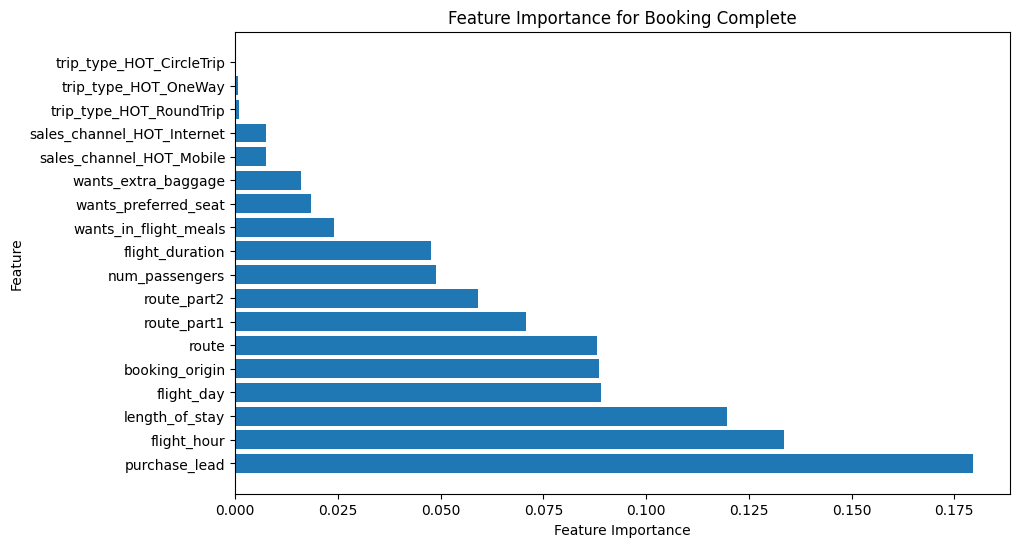

In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named df
# Replace 'df' with your actual DataFrame name

# Define features and the target variable
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

# Create and fit a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Booking Complete')
plt.show()


In [42]:
# Extract feature importances
feature_importances = clf.feature_importances_

# Create a dictionary to store feature names and their importances
feature_importance_dict = dict(zip(X.columns, feature_importances))


def return_column_names(df):
    return df.columns

colun_names = return_column_names(df)


list_features = []

for name in colun_names:
    if name != 'booking_complete':
        importance_of_num_passengers = feature_importance_dict[name]
        list_features.append([name, importance_of_num_passengers])

print(list_features)

[['num_passengers', 0.04875753930569538], ['purchase_lead', 0.17959880552259086], ['length_of_stay', 0.11974755822857167], ['flight_hour', 0.13365531514693127], ['flight_day', 0.08910894988736837], ['route', 0.08816400122651684], ['booking_origin', 0.08841471950958117], ['wants_extra_baggage', 0.015904579213756393], ['wants_preferred_seat', 0.018346728697819732], ['wants_in_flight_meals', 0.024153361671860305], ['flight_duration', 0.04759390690019046], ['sales_channel_HOT_Internet', 0.007448224288207775], ['sales_channel_HOT_Mobile', 0.0075095578667309665], ['trip_type_HOT_CircleTrip', 0.00030342478817120517], ['trip_type_HOT_OneWay', 0.0007354226748655243], ['trip_type_HOT_RoundTrip', 0.0009161612412644307], ['route_part1', 0.07065416127801696], ['route_part2', 0.0589875825518608]]


In [43]:
# Given the list of feature names and their importances
feature_importances = [['num_passengers', 0.04875753930569538], ['purchase_lead', 0.17959880552259086], ['length_of_stay', 0.11974755822857167], ['flight_hour', 0.13365531514693127], ['flight_day', 0.08910894988736837], ['route', 0.08816400122651684], ['booking_origin', 0.08841471950958117], ['wants_extra_baggage', 0.015904579213756393], ['wants_preferred_seat', 0.018346728697819732], ['wants_in_flight_meals', 0.024153361671860305], ['flight_duration', 0.04759390690019046], ['sales_channel_HOT_Internet', 0.007448224288207775], ['sales_channel_HOT_Mobile', 0.0075095578667309665], ['trip_type_HOT_CircleTrip', 0.00030342478817120517], ['trip_type_HOT_OneWay', 0.0007354226748655243], ['trip_type_HOT_RoundTrip', 0.0009161612412644307], ['route_part1', 0.07065416127801696], ['route_part2', 0.0589875825518608]]

# Find the maximum importance value
max_importance = max(importance for feature, importance in feature_importances)

# Scale all importances to be in the range of 0 to 100%
scaled_feature_importances = [[feature, (importance / max_importance) * 100] for feature, importance in feature_importances]

# Sort the scaled importances in descending order
sorted_feature_importances = sorted(scaled_feature_importances, key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, scaled_importance in sorted_feature_importances:
    print(f"{feature}: {scaled_importance:.2f}%")


purchase_lead: 100.00%
flight_hour: 74.42%
length_of_stay: 66.68%
flight_day: 49.62%
booking_origin: 49.23%
route: 49.09%
route_part1: 39.34%
route_part2: 32.84%
num_passengers: 27.15%
flight_duration: 26.50%
wants_in_flight_meals: 13.45%
wants_preferred_seat: 10.22%
wants_extra_baggage: 8.86%
sales_channel_HOT_Mobile: 4.18%
sales_channel_HOT_Internet: 4.15%
trip_type_HOT_RoundTrip: 0.51%
trip_type_HOT_OneWay: 0.41%
trip_type_HOT_CircleTrip: 0.17%
